# scipy, matplotlib.pyplot, pandas (and datetime)

Note the **```pyplot```** module is imported directoy from **```matplotlib```** and is shortened to **```plt```**.  Pyplot is the main tool you will need to plot on screen and save figures using Matplotlib.

The best way to learn about scipy is through its [official tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/).

## Look at the official scipy doc [here](https://docs.scipy.org/doc/scipy-1.0.0/reference/).  It has a TON of goodies:
* ```scipy.stats```

* ```scipy.integrate```

* ```scipy.optimize```

* ```scipy.interpolate```

* ```scipy.fftpack```

* ```scipy.signal```

* ```scipy.linalg```

* ```scipy.io```

In [1]:
import numpy
import scipy
import scipy.stats
import matplotlib.pyplot as plt # note, this is often imported as "plt"
import pandas # for 2D tables like csv and text files
import datetime # for time series data

* Now let's create a "noisy" array of data.  Add in noise by using **```numpy.random.normal()```**, which draws random samples around a Gaussian distribution taking 3 arguments as input (location, stdev/scale, and size)
* ```numpy.random.normal()``` documentation is [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal)
* Other random sampling options from numpy are [here](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [2]:
N = 1000
xvals = numpy.linspace(1,100,N)

In [3]:
a_signal = numpy.linspace(1,100,N)
a_noise = numpy.random.normal(loc=0, scale=5, size=N)
a = a_signal+a_noise

In [4]:
scipy.stats.describe(a)

DescribeResult(nobs=1000, minmax=(-9.030230774976989, 113.85761752652245), mean=50.624996120897706, variance=850.5550377489345, skewness=0.029523613834330983, kurtosis=-1.097190662927714)

In [5]:
b_signal = numpy.linspace(1,100,N)
b_noise = numpy.random.normal(loc=0, scale=15, size=N)
b = b_signal+b_noise

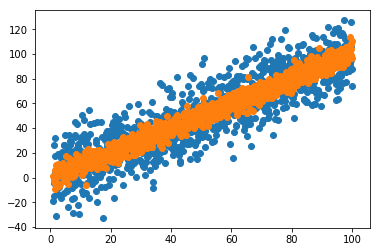

In [6]:
plt.scatter(xvals, b) # blue
plt.scatter(xvals, a) # orange

## ==========> NOW YOU TRY <==========

* Create an array ```c``` with twice the spread of ```b```, then add it to the plot above

In [7]:
#plt.scatter(xvals, c)
#plt.scatter(xvals, b)
#plt.scatter(xvals, a)

## Standard deviation

* Center a and b by their means:

```a_stdev = numpy.std(a)```

In [8]:
a_ctd = a - a.mean()
b_ctd = b - b.mean()

* Compute the standard deviation of a and b.  The following lines of code are equivalent to the standard deviation formula:

$$ \sigma_a = \sqrt{ \frac{1}{N-1} \sum^n_{i=1}(a_i - \bar{a})^2 } $$

In [9]:
a_stdev = numpy.std(a, ddof=1) # ensures 1/(N-1), default is (1/N)

#a_stdev = ( (1./(N-1)) * numpy.sum(a_ctd**2.) ) ** 0.5

#a_stdev = numpy.sqrt( (1./(N-1)) * numpy.sum(a_ctd**2.) )

In [10]:
b_stdev = numpy.sqrt( (1./(N-1)) * numpy.sum(b_ctd**2.) )

## Pearson correlation using ```scipy.stats.pearsonr()```

* Compute the correlation between a and b.  You can do this using **```scipy.stats.pearsonr()```**.

* Note that this function outputs a tuple with the correlation value and the p-value.  See the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html).

* Also beware that the **```scipy.stats.pearsonr()```** function does not use a conservative $\frac{1}{(N-1)}$ estimate of standard deviation.

$$ \mathrm{corr} = \frac{1}{N} \frac{ \sum^n_{i=1} (a_i-\bar{a})(b_i-\bar{b})}{\sigma_a \sigma_b} $$

In [11]:
ab_corr = scipy.stats.pearsonr(a,b)
print(ab_corr) # returns corr coeff. and p-value

(0.8638110054558448, 2.153269938115586e-299)


* You can also calculate the correlation by hand (you're on your own for the p-value, though...)

In [12]:
a_stdev, b_stdev = numpy.std(a), numpy.std(b) # note multiple assignments per line, NON-conservative estimate
ab_corr = numpy.mean( (b_ctd*a_ctd) / (a_stdev*b_stdev) )

In [13]:
print(ab_corr)

0.8638110054558448


## Linear regression using ```scipy.stats.linregress()```

* Now calculate a simple linear regression on the a and b arrays.  Note **```scipy.stats.linregress()```** outputs 5 different variables.  See its documentation [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In [14]:
a_slope, a_intercept, a_rval, a_pval, a_stderr = scipy.stats.linregress(xvals,a)
b_slope, b_intercept, b_rval, b_pval, b_stderr = scipy.stats.linregress(xvals,b)
print(a_slope, b_slope)

1.0049369534078425 0.9820037326408537


Calculate a line of best fit using the linear regression info:

In [15]:
a_fit = a_slope * xvals + a_intercept
b_fit = b_slope * xvals + b_intercept

# matplotlib.pyplot

If/when you have the time, the official [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) is a good place to start.

## Simple plotting

* Now plot the a and b data along with a best-fit line.
* There are a few different ways of creating a figure.
* One way is using **```plt.plot()```** directory:

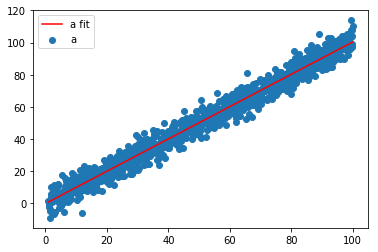

In [16]:
plt.scatter(xvals, a, label='a')
plt.plot(xvals, a_fit, label='a fit', c='red')
plt.legend()

Another way is calling **```plt.subplot()```**, which will allow you to plot panels using a (row,col,plot_number) syntax:

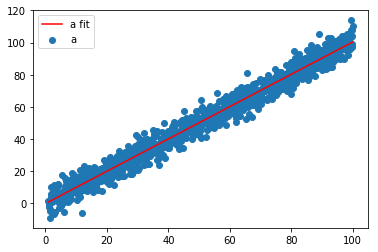

In [17]:
ax1 = plt.subplot(1,1,1) # (rows, cols, plot), (111) also works --> commas not necessary
ax1.scatter(xvals, a, label='a')
ax1.plot(xvals, a_fit, label='a fit', c='red')
ax1.legend()

The __most flexible__ way of creating a figure is to create it using **```fig = plt.figure()```** and *adding* subplots one by one using **```fig.add_subplot()```**.

* ** The advantage of this method is that axes can be adjusted individually and there is a LOT of flexibitily here.**
* **If you plan to be creating publication-ready figures, this is a great place to start.**
* Note this figure is saved as a PDF using the **```plt.savefig()```** function:  http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig

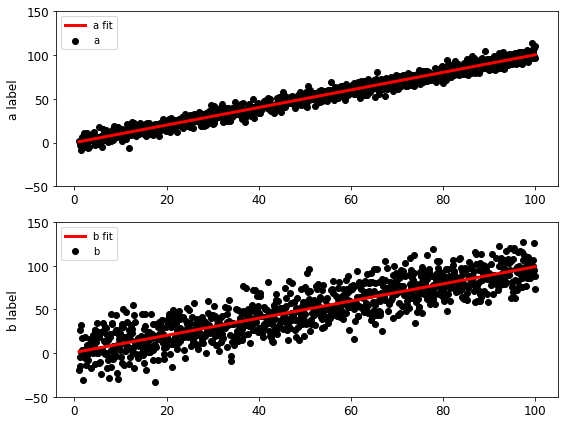

In [18]:
fig = plt.figure(figsize=(8,6)) # size is optional

my_font_size = 12

ax1 = fig.add_subplot(2,1,1) # (rows, cols, plot)
ax1.scatter(xvals, a, label='a', color='black')
ax1.plot(xvals, a_fit, color='red', label='a fit', lw=3)
ax1.set_ylim(-50,150)
ax1.set_ylabel('a label', fontsize = my_font_size)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc=0)

ax2 = fig.add_subplot(2,1,2)
ax2.scatter(xvals, b, label='b', color='black')
ax2.plot(xvals, b_fit, color='red', label='b fit', lw=3)
ax2.set_ylim(-50,150)
ax2.set_ylabel('b label', fontsize = my_font_size)
ax2.tick_params(labelsize = my_font_size)
ax2.legend(loc=0)

plt.tight_layout() # helpful for stretching axes to the "figsize" chosen in line 1
#plt.savefig('ab_trends.pdf', transparent=True)

# Plotting the Niño 3.4 index (with ```pandas``` and ```datetime```)

* Download MONTHLY Niño index data (.txt file) from the Climate Prediction Center website:
http://www.cpc.ncep.noaa.gov/data/indices/ersst4.nino.mth.81-10.ascii

* This file is available in the week2 folder on the seminar webpage

* Read a txt or csv file using the ```pandas.read_table()``` function

In [19]:
filename = 'ersst4.nino.mth.81-10.ascii.txt'
data_file = pandas.read_table(filename, delim_whitespace=True)
data = data_file.values

In [20]:
type(data_file)

pandas.core.frame.DataFrame

In [21]:
data_file
#data_file.describe()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1950,1,23.30,-1.41,23.84,-1.96,27.18,-1.17,24.91,-1.80
1,1950,2,24.33,-1.85,25.06,-1.49,26.83,-1.37,25.26,-1.62
2,1950,3,25.24,-1.33,26.53,-0.76,26.91,-1.41,26.08,-1.28
3,1950,4,23.88,-1.80,26.64,-0.97,27.42,-1.16,26.38,-1.46
4,1950,5,22.91,-1.56,25.87,-1.42,27.95,-0.94,26.25,-1.71
5,1950,6,21.60,-1.55,25.63,-1.00,28.27,-0.62,26.59,-1.14
6,1950,7,20.58,-1.47,25.01,-0.80,27.84,-1.00,26.40,-0.91
7,1950,8,20.29,-0.82,24.52,-0.71,27.54,-1.23,25.90,-1.06
8,1950,9,19.67,-1.19,24.17,-0.90,27.44,-1.34,25.73,-1.14
9,1950,10,20.14,-1.03,24.41,-0.71,27.43,-1.34,25.86,-0.97


In [22]:
# the first column [0] is the year of the data set
# the ninth column [9] is the Nino3.4 index
print(data.shape)

(795, 10)


In [23]:
years = data[:,0]
months = data[:,1]
nino34 = data[:,8]
nino34_centered = nino34 - nino34.mean()

### Use the ```datetime``` module in Python to handle dates and time series

This file contains monthly averages of ENSO indices.  The time is only given as the year, however, so we must convert 

In [24]:
today = datetime.date(2018,3,7)
now = datetime.datetime(2018,3,7,13,45,0)
print(today)
print(now)

2018-03-07
2018-03-07 13:45:00


In [25]:
ntime = years.size # length of time series array

# TWO WAYS to create a list of datetime objects
# here, looping
year_month_list = []
for i in range(ntime):
    year_month_list.append(datetime.date( int(years[i]), int(months[i]) ,15))

* [List comprehensions](http://www.secnetix.de/olli/Python/list_comprehensions.hawk) are a fast way to create a list that has a "built-in" for loop:

In [26]:
# here, list comprehension (kind of like a backwards list, all tucked into brackets)
year_month_list = [datetime.date(int(years[i]), int(months[i]), 15) for i in range(ntime)]

* Now create a figure of the monthly, centered Niño 3.4 index

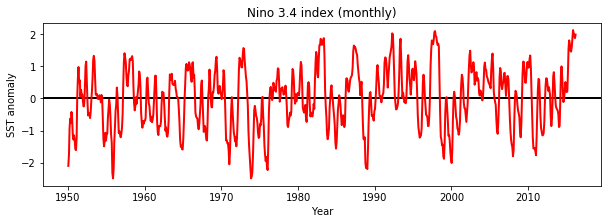

In [27]:
fig = plt.figure(figsize=(10,3)) # figsize=(inches wide, inches tall) --> not necessary
ax = fig.add_subplot(1,1,1)

ax.plot(year_month_list,nino34_centered, color='red', lw=2) # a higher zorder means the line will sit over others
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_title('Nino 3.4 index (monthly)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)

**Create a moving or rolling average using the ```pandas``` module, which comes with the Anaconda distribution but can be installed separately**

* Note pandas is the Python Data Analysis Library and is *distinct* from NumPy and SciPy but provides a lot of complementary functions.  Read about it [here](http://pandas.pydata.org/).

In [28]:
nino34_centered_rolling_mean = pandas.Series(nino34_centered).rolling(window=12,center=True).mean()

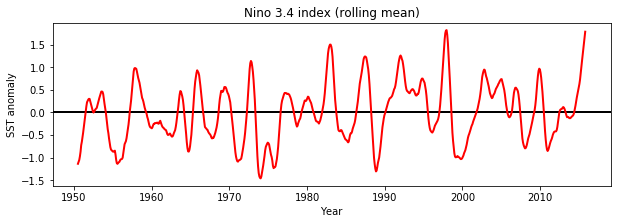

In [29]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(year_month_list,nino34_centered_rolling_mean, color='red', lw=2, zorder=2)
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_title('Nino 3.4 index (rolling mean)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)

## ==========> NOW YOU TRY <==========

* Change the rolling mean above to be a 3-year mean, and re-run the cells to plot